# Vamos a hacer una red simple para entrener con mnist

- Implementar una red convolucional simple en Keras para entrenar con MNIST
- Entrenar la red
- Usar la red para predecir en ejemplos nuevos

## Modelo simple en Keras/Tensorflow

Armemos una red muy simple para clasificar digitos.

In [ ]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

num_filters = 8
filter_size = 3
pool_size = 2

# Armar el modelo
model = Sequential()
model.add(Conv2D(num_filters, filter_size, 1, input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))  

# otra manera de hacer lo mismo:
#model = Sequential([
#  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
#  MaxPooling2D(pool_size=pool_size),
#  Flatten(),
#  Dense(10, activation='softmax'),
#])

# Compilar el modelo
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


## Cargamos los datos


11501568/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


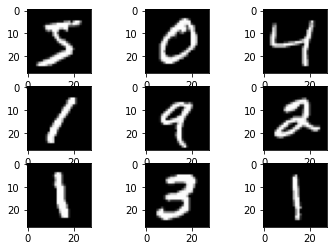

In [ ]:
# Cargar el dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# Imprimir un resumen de los datos
print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))
# Plotear las primeras imágenes
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

# Normalizamos las imágenes
train_X_n = (train_X / 255) - 0.5
test_X_n = (test_X / 255) - 0.5

# Hacemos reshape de las imágenes para que tengan un canal
train_X_n = train_X.reshape((train_X_n.shape[0], 28, 28, 1))
test_X_n = test_X.reshape((test_X_n.shape[0], 28, 28, 1))

# también se puede hacer
#train_X_n = np.expand_dims(train_X_n, axis=3)
#test_X_n = np.expand_dims(test_X_n, axis=3)



### Entrenamos el modelo

Epoch 1/3
1875/1875 [==============================] - 20s 10ms/step - loss: 1.7525 - accuracy: 0.8907 - val_loss: 0.5376 - val_accuracy: 0.9318
Epoch 2/3
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3582 - accuracy: 0.9431 - val_loss: 0.2981 - val_accuracy: 0.9472
Epoch 3/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2323 - accuracy: 0.9522 - val_loss: 0.2521 - val_accuracy: 0.9539
[7 2 1 0 4]
[7 2 1 0 4]


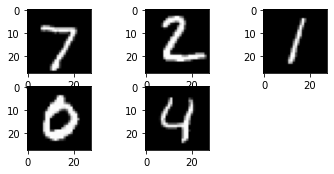

In [ ]:
# Entrenamos el modelo
model.fit(
  train_X_n,
  to_categorical(train_y),
  epochs=3,
  validation_data=(test_X_n, to_categorical(test_y)),
)

# Guardar el modelo al disco
#model.save_weights('cnn.h5')

# Cargar el modelo del disco
# model.load_weights('cnn.h5')

# Predecir las primeras 5 imágines del test set
predicciones = model.predict(test_X_n[:5])

# Imprimir las predicciones
print(np.argmax(predicciones, axis=1)) # [7, 2, 1, 0, 4]

# Chequear que son correctas
print(test_y[:5]) # [7, 2, 1, 0, 4]

# Plotear esas imágenes
for i in range(5):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(test_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________
None


### Ejercicio: hacer otra red que tenga:
1. Capa convolucional, 8 filtros de 3x3
2. Capa max pool
3. Capa convolucional, 16 filtros de 3x3
4. Capa max pool
5. Capa convolucional, 32 filtros de 3x3
6. Capa max pool
7. Flatten
8. Capa densa 
9. Salida

In [ ]:
# Armar el modelo
model = Sequential()
model.add(Conv2D(8, 3, input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(16, 3))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(32, 3))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))  

# Compilar el modelo
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)               

Epoch 1/3
1875/1875 [==============================] - 28s 15ms/step - loss: 1.6155 - accuracy: 0.8366 - val_loss: 0.3238 - val_accuracy: 0.9195
Epoch 2/3
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2458 - accuracy: 0.9342 - val_loss: 0.1836 - val_accuracy: 0.9467
Epoch 3/3
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1589 - accuracy: 0.9536 - val_loss: 0.1471 - val_accuracy: 0.9580
[7 2 1 0 4]
[7 2 1 0 4]


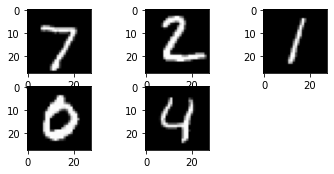

In [ ]:
# Entrenamos el modelo
model.fit(
  train_X_n,
  to_categorical(train_y),
  epochs=3,
  validation_data=(test_X_n, to_categorical(test_y)),
)

# Guardar el modelo al disco
#model.save_weights('cnn.h5')

# Cargar el modelo del disco
# model.load_weights('cnn.h5')

# Predecir las primeras 5 imágines del test set
predicciones = model.predict(test_X_n[:5])

# Imprimir las predicciones
print(np.argmax(predicciones, axis=1)) # [7, 2, 1, 0, 4]

# Chequear que son correctas
print(test_y[:5]) # [7, 2, 1, 0, 4]

# Plotear esas imágenes
for i in range(5):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(test_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
# Ejercicio: visualizar los filtros en las diferentes capas para ver qué features capturan
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  filters, biases = layer.get_weights()
  print(layer, filters)
  f_min, f_max = filters.min(), filters.max()
  filters = (filters - f_min) / (f_max - f_min)
  
 

<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f986fe27290> [[[[-0.01584012  0.04918342 -0.03652347 -0.01881676  0.17829186
     0.00415312 -0.06053118 -0.03924889]]

  [[-0.02530548  0.02791576  0.03350521 -0.01537814 -0.11033151
    -0.07439644  0.07423086  0.07174563]]

  [[-0.00835971  0.00179365 -0.02170893  0.1283872  -0.0572341
    -0.02432209  0.04675253 -0.09373207]]]


 [[[-0.05006355  0.05500695  0.1483318   0.01555827 -0.16529612
     0.13414036  0.01466032  0.04307637]]

  [[ 0.0141535  -0.00852298 -0.09373016 -0.02377161  0.19236237
    -0.0906851  -0.05587125  0.07161233]]

  [[-0.03971148  0.05132797 -0.02084069  0.0600904  -0.16824049
    -0.04101615  0.04526649  0.04397092]]]


 [[[-0.01404604  0.07026708  0.07344932 -0.02025757 -0.01387889
     0.01326723 -0.01243986 -0.03806444]]

  [[-0.02091309  0.02567406 -0.10434591 -0.0182874  -0.04771606
     0.10483123 -0.0729818  -0.04976194]]

  [[-0.02935464  0.05330845  0.00916621 -0.11080941  0.1349316

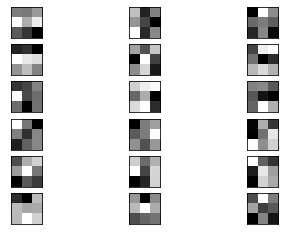

In [ ]:
n_filters, ix = 6, 1
for i in range(n_filters):
	f = filters[:, :, :, i]
	for j in range(3):
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
pyplot.show()